# Ejemplos de algoritmos con *Sweep Line Paradigm*

## Conjunto de intersecciones

Dado un conjunto de *n* segmentos, encontrar todas las intersecciones:

* El algoritmo por fuerza bruta sería revisar cada segmento contra los otros *n-1* segmentos
* Con el algoritmo *sweep line*:
    * **Orden**: De izquierda a derecha.
    * **Estado**: Segmentos intersectando la línea de barrido
    * **Eventos estáticos**: Inicio y fin de los segmentos.
    * **Eventos dinámicos**: Intersecciones de los segmentos.
    * Revisar intersecciones solo entre segmentos adyacentes en los estados dinámicos?

## Datos

In [2]:
segments = [
    ((3, 6), (10, 3)),  # S1
    ((4, 3), (14, 5)),  # S2
    ((5, 4), (15, 8)),  # S3
    ((12, 3), (14, 9))  # S4
]
labels = ["S1", "S2", "S3", "S4"]

S1 = ((3, 6), (10, 3))
S2 = ((4, 3), (14, 5))
S3 = ((5, 4), (15, 8))
S4 = ((12, 3), (14, 9))

## Funciones

In [3]:
import matplotlib.pyplot as plt

def plot_segments_with_sweepline(segments, x_line, labels=None,
                                 show_intersections=True, figsize=(8, 6)):
    """
    Plot line segments and a vertical sweep line at x = x_line.

    Parameters
    ----------
    segments : list[tuple[tuple[float,float], tuple[float,float]]]
        Each item is ((x1, y1), (x2, y2)).
    x_line : float
        X position of the vertical sweep line.
    labels : list[str] | None
        Optional labels for segments (e.g., ["S1","S2",...]).
        If None, labels will be S1, S2, ...
    show_intersections : bool
        If True, mark intersections of segments with the sweep line.
    figsize : tuple[int,int]
        Figure size in inches.

    Returns
    -------
    status : list[tuple[str, float]]
        List of (label, y_at_x_line) for segments intersecting the sweep line,
        ordered by y (bottom to top).
    """
    if labels is None:
        labels = [f"S{i+1}" for i in range(len(segments))]
    assert len(labels) == len(segments), "labels length must match segments"

    def intersects_and_y_at_x(p1, p2, x0):
        (x1, y1), (x2, y2) = p1, p2
        # Check if x0 lies within the closed interval of the segment in x
        xmin, xmax = (x1, x2) if x1 <= x2 else (x2, x1)
        if x0 < xmin or x0 > xmax:
            return None  # no intersection within the segment extent
        if x1 == x2:
            # Vertical segment: if it coincides with the sweep line, return both endpoints' y-range midpoint
            if x0 == x1:
                return (y1 + y2) / 2.0
            return None
        # Linear interpolation to find y at x0
        t = (x0 - x1) / (x2 - x1)
        y = y1 + t * (y2 - y1)
        return y

    # Collect status (segments crossing x_line) with their y at that x
    status = []
    for lbl, (p1, p2) in zip(labels, segments):
        y_at = intersects_and_y_at_x(p1, p2, x_line)
        if y_at is not None:
            status.append((lbl, y_at))

    # Sort by y (bottom to top)
    status.sort(key=lambda tup: tup[1])

    # Build title with status set
    if status:
        status_str = ", ".join([f"{lbl}@{y:.2f}" for lbl, y in status])
        title = f"Estado de la línea de barrido en x={x_line}: {{ {status_str} }}"
    else:
        title = f"Estado de la línea de barrido en x={x_line}: $\\emptyset$"

    # ---- Plotting ----
    plt.figure(figsize=figsize)

    # Plot segments
    for lbl, ((x1, y1), (x2, y2)) in zip(labels, segments):
        plt.plot([x1, x2], [y1, y2], marker='o', label=lbl)

    # Sweep line
    plt.axvline(x=x_line, linestyle='--', linewidth=1, label="línea de barrido")

    # Optional: mark intersections
    if show_intersections and status:
        for lbl, y in status:
            plt.plot([x_line], [y], marker='o')  # default style
            plt.text(x_line, y, f" {lbl}", va='center', ha='left')

    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid(True)
    plt.axis("equal")
    plt.show()

    return status

def segment_intersection(p1, p2, q1, q2, eps=1e-9):
    (x1, y1), (x2, y2) = p1, p2
    (x3, y3), (x4, y4) = q1, q2

    rx, ry = x2 - x1, y2 - y1
    sx, sy = x4 - x3, y4 - y3

    rxs = rx * sy - ry * sx
    if abs(rxs) < eps:
        return None  # parallel or collinear (ignored for simplicity)

    qpx, qpy = x3 - x1, y3 - y1
    t = (qpx * sy - qpy * sx) / rxs
    u = (qpx * ry - qpy * rx) / rxs

    if 0 <= t <= 1 and 0 <= u <= 1:
        return (x1 + t * rx, y1 + t * ry)  # intersection point
    return None

## Algoritmo
### Paso 1

* Evento actual: Ninguno
* Estado de la línea de barrido: $\emptyset$
* Conjunto de Eventos (estáticos y dinámicos)
    1. S1 (Inicio, x=3)
    2. S2 (Inicio, x=4)
    3. S3 (Inicio, x=5)
    4. S1 (Fin, x=10)
    5. S4 (Inicio, x=12)
    6. S4 (Fin, x=14)
    7. S2 (Fin, x=14)
    8. S3 (Fin, x=15)

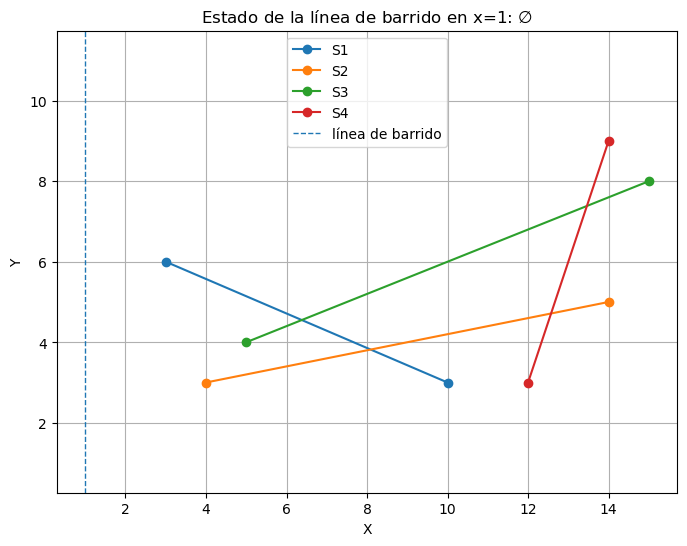

[]

In [4]:
plot_segments_with_sweepline(segments, x_line=1, labels=labels)

### Paso 2
* Evento actual: S1 (Inicio, x=3)
* Estado de la línea de barrido: $S1$
* Conjunto de Eventos (estáticos y dinámicos)
    1. ~~S1 (Inicio, x=3)~~ (se quita de la lista)
    2. S2 (Inicio, x=4)
    3. S3 (Inicio, x=5)
    4. S1 (Fin, x=10)
    5. S4 (Inicio, x=12)
    6. S4 (Fin, x=14)
    7. S2 (Fin, x=14)
    8. S3 (Fin, x=15)

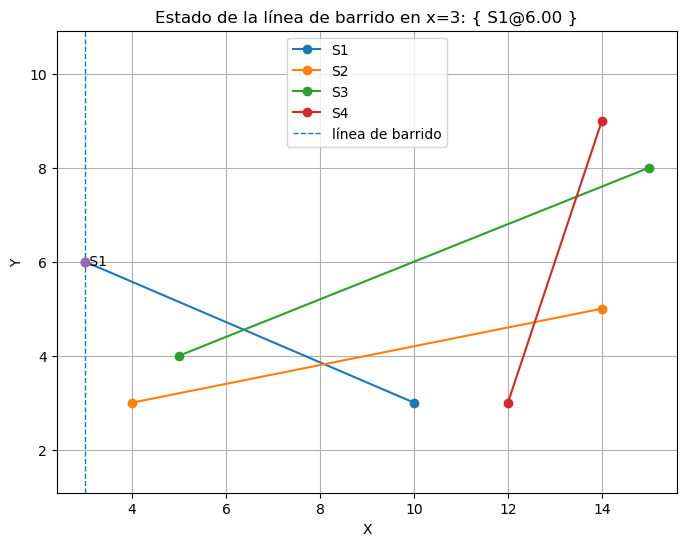

[('S1', 6.0)]

In [5]:
plot_segments_with_sweepline(segments, x_line=3, labels=labels)

### Paso 3
* Evento actual: S2 (Inicio, x=4)
* Estado de la línea de barrido: $S1, S2$
* Conjunto de Eventos (estáticos y dinámicos)
    1. ~~S2 (Inicio, x=4)~~ (se quita de la lista)
    2. S3 (Inicio, x=5)
    3. S1 $\cap$ S2 (intersección, se calcula y agrega, x=8.0909)
    4. S1 (Fin, x=10)
    5. S4 (Inicio, x=12)
    6. S4 (Fin, x=14)
    7. S2 (Fin, x=14)
    8. S3 (Fin, x=15)

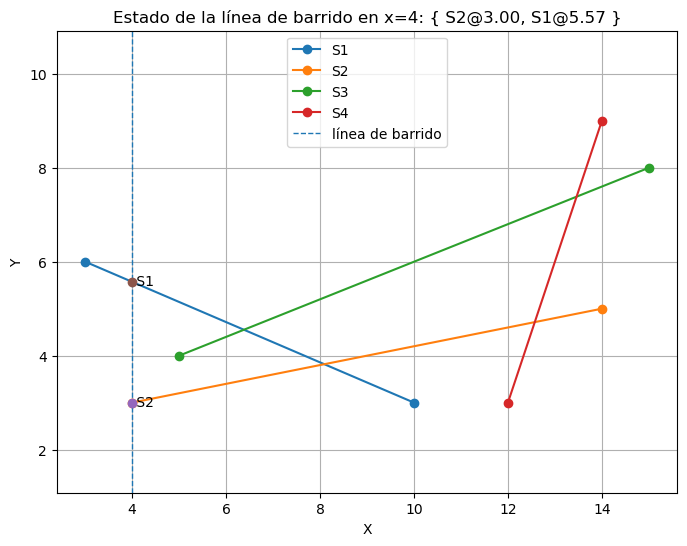

S1∩S2: (8.09090909090909, 3.8181818181818183)


In [9]:
plot_segments_with_sweepline(segments, x_line=4, labels=labels)
print("S1∩S2:", segment_intersection(*S1, *S2))

### Paso 4
* Evento actual: S3 (Inicio, x=5)
* Estado de la línea de barrido: $S1, S2, S3$
* Conjunto de Eventos (estáticos y dinámicos)
    1. ~~S3 (Inicio, x=5)~~ (se quita de la lista)
    2. S1 $\cap$ S2 (intersección, se calcula y agrega, x=6.3793)
    3. S1 $\cap$ S2 (intersección, x=8.0909)
    4. S1 (Fin, x=10)
    5. S4 (Inicio, x=12)
    6. S4 (Fin, x=14)
    7. S2 (Fin, x=14)
    8. S3 (Fin, x=15)

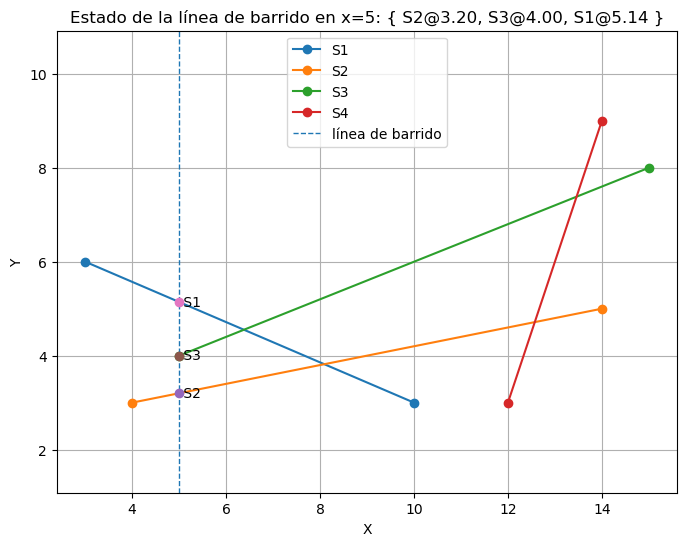

S1∩S3: (6.379310344827586, 4.551724137931035)
S2∩S3: None


In [10]:
plot_segments_with_sweepline(segments, x_line=5, labels=labels)
print("S1∩S3:", segment_intersection(*S1, *S3))
print("S2∩S3:", segment_intersection(*S3, *S2))

### Paso 5
* Evento actual: S1 $\cap$ S2 (intersección, x=6.3793)
* Estado de la línea de barrido: $S1, S2, S3$
* Conjunto de Eventos (estáticos y dinámicos)
    2. ~~S1 $\cap$ S2 (intersección, x=6.3793)~~ (se quita de la lista)
    3. S1 $\cap$ S2 (intersección, x=8.0909)
    4. S1 (Fin, x=10)
    5. S4 (Inicio, x=12)
    6. S4 (Fin, x=14)
    7. S2 (Fin, x=14)
    8. S3 (Fin, x=15)

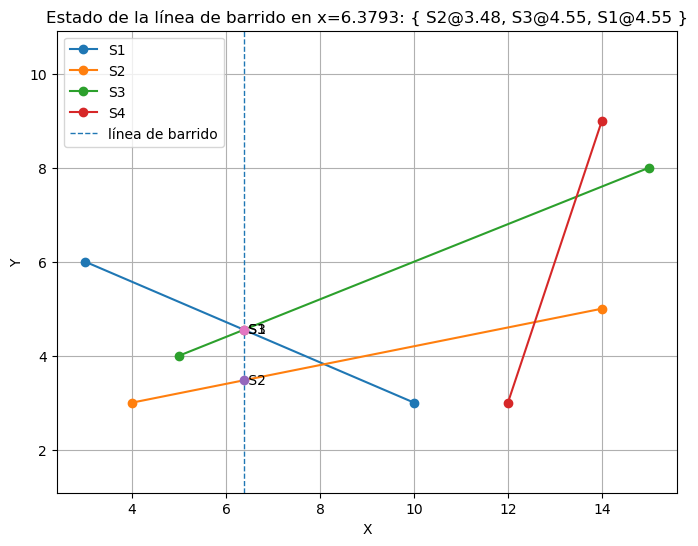

[('S2', 3.47586), ('S3', 4.5517199999999995), ('S1', 4.551728571428572)]

In [24]:
plot_segments_with_sweepline(segments, x_line=6.3793, labels=labels)

### Paso 6
* Evento actual: S1 $\cap$ S2 (intersección, x=8.0909)
* Estado de la línea de barrido: $S1, S2, S3$
* Conjunto de Eventos (estáticos y dinámicos)
    3. ~~S1 $\cap$ S2 (intersección, x=8.0909)~~ (se quita de la lista)
    4. S1 (Fin, x=10)
    5. S4 (Inicio, x=12)
    6. S4 (Fin, x=14)
    7. S2 (Fin, x=14)
    8. S3 (Fin, x=15)

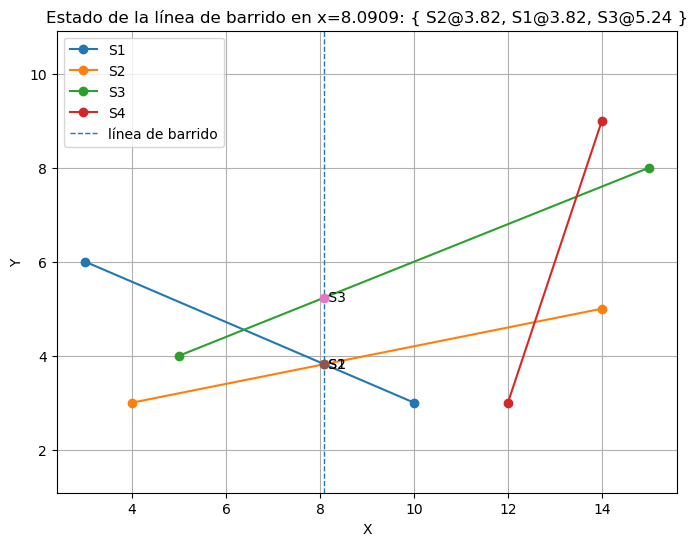

[('S2', 3.81818), ('S1', 3.8181857142857147), ('S3', 5.2363599999999995)]

In [26]:
plot_segments_with_sweepline(segments, x_line=8.0909, labels=labels)

### Paso 7
* Evento actual: S1 (Fin, x=10)
* Estado de la línea de barrido: $S2, S3$
* Conjunto de Eventos (estáticos y dinámicos)
    4. ~~S1 (Fin, x=10)~~ (se quita de la lista)
    5. S4 (Inicio, x=12)
    6. S4 (Fin, x=14)
    7. S2 (Fin, x=14)
    8. S3 (Fin, x=15)

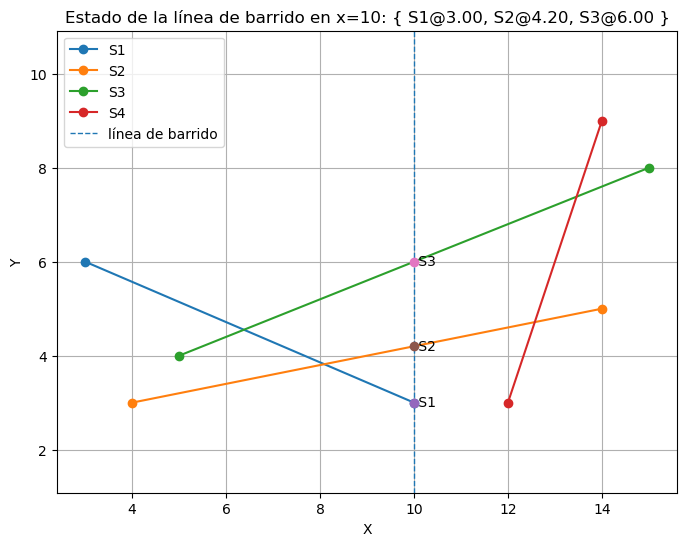

[('S1', 3.0), ('S2', 4.2), ('S3', 6.0)]

In [27]:
plot_segments_with_sweepline(segments, x_line=10, labels=labels)

### Paso 8
* Evento actual: S4 (Inicio, x=12)
* Estado de la línea de barrido: $S2, S3, S4$
* Conjunto de Eventos (estáticos y dinámicos)
    1. ~~S4 (Inicio, x=12)~~ (se quita de la lista)
    2. S2 $\cap$ S4 (intersección, se calcula y agrega, x=12.5714)
    3. S3 $\cap$ S4 (intersección, se calcula y agrega, x=13.4615)
    6. S4 (Fin, x=14)
    7. S2 (Fin, x=14)
    8. S3 (Fin, x=15)

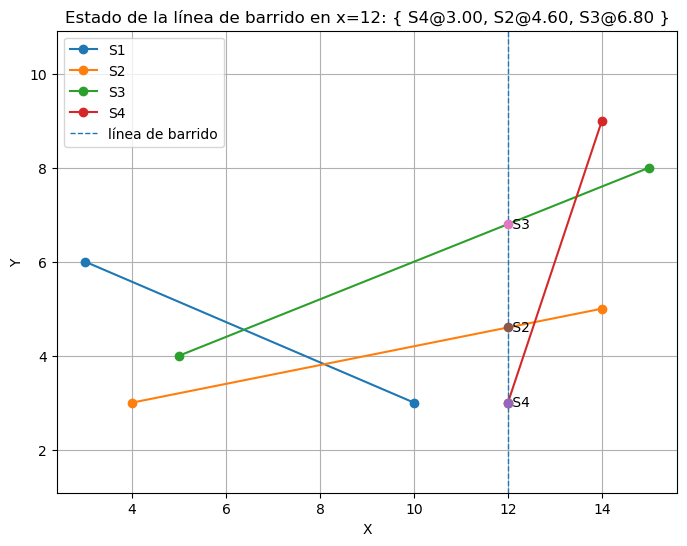

S2∩S4: (12.571428571428571, 4.714285714285714)
S3∩S4: (13.461538461538462, 7.384615384615385)


In [28]:
plot_segments_with_sweepline(segments, x_line=12, labels=labels)
print("S2∩S4:", segment_intersection(*S2, *S4))
print("S3∩S4:", segment_intersection(*S3, *S4))

### Paso 9
* Evento actual: S2 $\cap$ S4 (intersección, x=12.5714)
* Estado de la línea de barrido: $S2, S3, S4$
* Conjunto de Eventos (estáticos y dinámicos)
    2. ~~S2 $\cap$ S4 (intersección, x=12.5714)~~ (se quita de la lista)
    3. S3 $\cap$ S4 (intersección, x=13.4615)
    6. S4 (Fin, x=14)
    7. S2 (Fin, x=14)
    8. S3 (Fin, x=15)

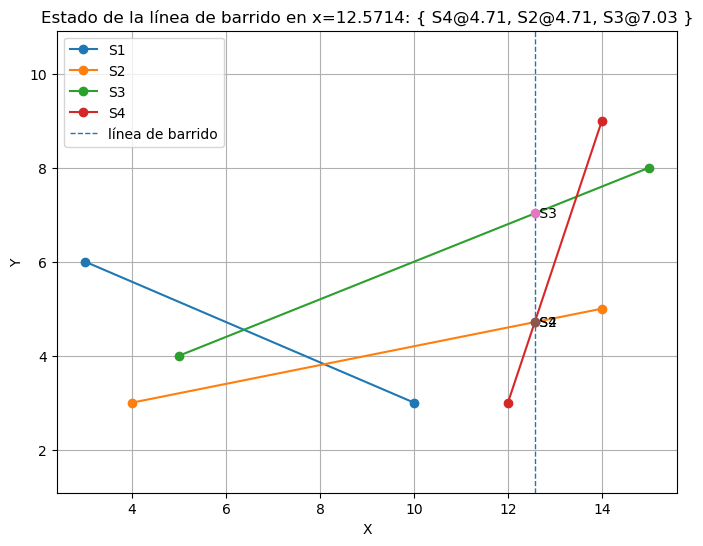

[('S4', 4.714200000000002),
 ('S2', 4.7142800000000005),
 ('S3', 7.028560000000001)]

In [16]:
plot_segments_with_sweepline(segments, x_line=12.5714, labels=labels)

### Paso 10
* Evento actual: S3 $\cap$ S4 (intersección, x=13.4615)
* Estado de la línea de barrido: $S2, S3, S4$
* Conjunto de Eventos (estáticos y dinámicos)
    3. ~~S3 $\cap$ S4 (intersección, x=13.4615)~~ (se quita de la lista)
    6. S4 (Fin, x=14)
    7. S2 (Fin, x=14)
    8. S3 (Fin, x=15)

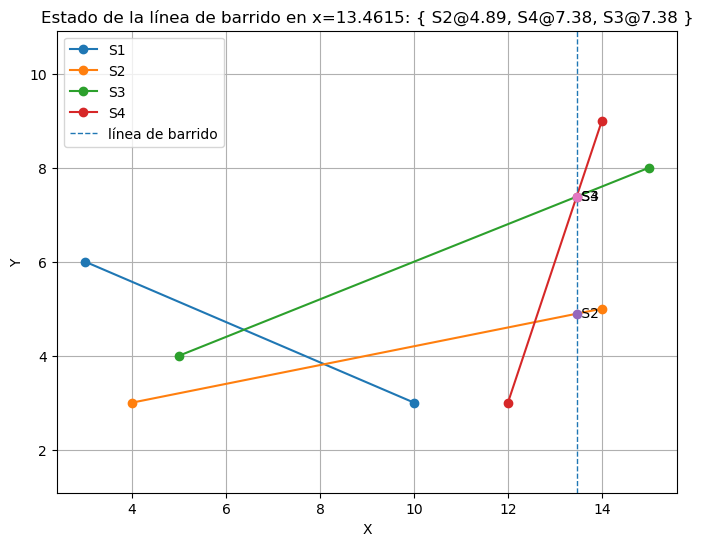

[('S2', 4.8923), ('S4', 7.384499999999997), ('S3', 7.3846)]

In [17]:
plot_segments_with_sweepline(segments, x_line=13.4615, labels=labels)

### Paso 11
* Evento actual: S4 (Fin, x=14)
* Estado de la línea de barrido: $S2, S3, S4$
* Conjunto de Eventos (estáticos y dinámicos)
    6. ~~S4 (Fin, x=14)~~ (se quita de la lista)
    7. S2 (Fin, x=14)
    8. S3 (Fin, x=15)

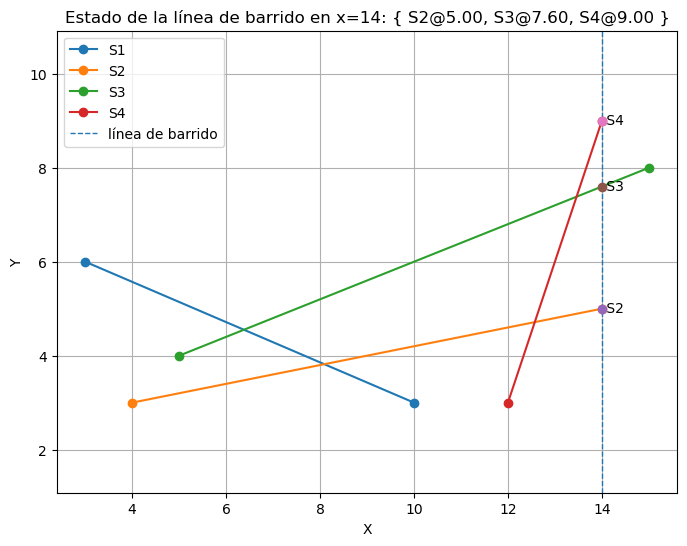

[('S2', 5.0), ('S3', 7.6), ('S4', 9.0)]

In [18]:
plot_segments_with_sweepline(segments, x_line=14, labels=labels)

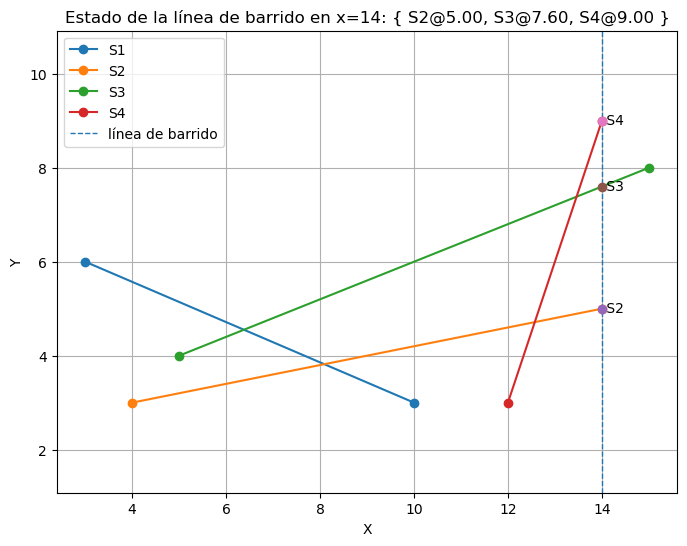

[('S2', 5.0), ('S3', 7.6), ('S4', 9.0)]

In [19]:
plot_segments_with_sweepline(segments, x_line=14, labels=labels)

* Estado de la línea de barrido: $S2, S3, S4$
* Conjunto de Eventos (estáticos y dinámicos)
    7. ~~S2 (Fin, x=14)~~ (se quita de la lista)
    8. S3 (Fin, x=15)

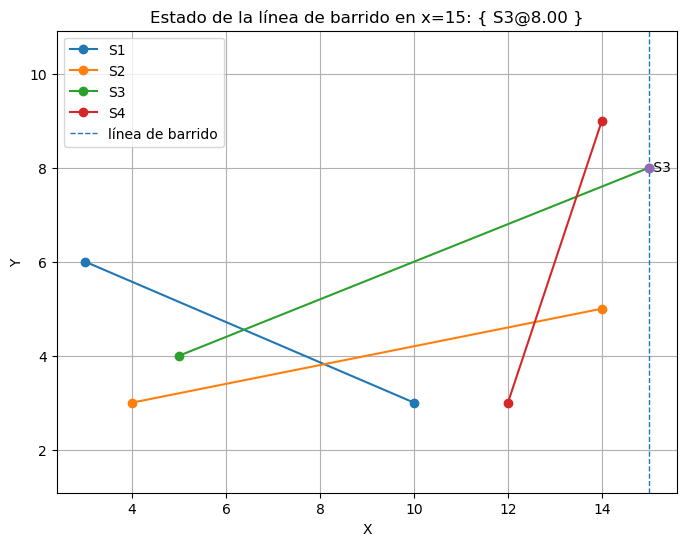

[('S3', 8.0)]

In [21]:
plot_segments_with_sweepline(segments, x_line=15, labels=labels)

* Estado de la línea de barrido: $S2, S3, S4$
* Conjunto de Eventos (estáticos y dinámicos)
    8. ~~S3 (Fin, x=15)~~ (se quita de la lista)

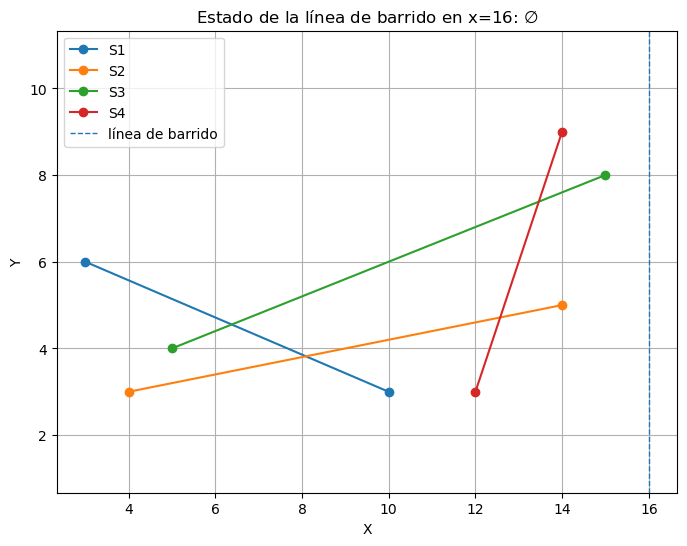

[]

In [23]:
plot_segments_with_sweepline(segments, x_line=16, labels=labels)

### Paso 12
* Evento actual: Ninguno
* Estado de la línea de barrido: $\emptyset$
* Conjunto de Eventos (estáticos y dinámicos)

# Referencias
* [The Sweep Line Paradigm](https://barequet.cs.technion.ac.il/teaching/cg/fa20/Tutorial%202%20-%20The%20sweep%20line%20paradigm.pdf)